In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

#Read the airbnb data
df = pd.read_csv('/content/Airbnb_data.csv', on_bad_lines='skip', engine='python')
df.head()

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,$193,10.0,9.0,19-10-2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,$28,30.0,45.0,21-05-2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,$124,3.0,0.0,NaN,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,$74,30.0,270.0,05-07-2019,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,$41,10.0,9.0,19-11-2018,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7738 entries, 0 to 7737
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              7738 non-null   int64  
 1   NAME                            7678 non-null   object 
 2   host id                         7738 non-null   int64  
 3   host_identity_verified          7665 non-null   object 
 4   host name                       7717 non-null   object 
 5   neighbourhood group             7711 non-null   object 
 6   neighbourhood                   7722 non-null   object 
 7   lat                             7730 non-null   float64
 8   long                            7730 non-null   float64
 9   country                         7688 non-null   object 
 10  country code                    7659 non-null   object 
 11  instant_bookable                7659 non-null   object 
 12  cancellation_policy             76

In [18]:
df.duplicated().value_counts()

,count
False,5214
True,2524


In [19]:
df[df['neighbourhood group'] == 'brookln']

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
13,1008516,"Lovely Room 1, Garden, Best Area, Legal rental",26802410424,verified,Darcy,brookln,South Slope,40.66829,-73.98779,United States,...,$116,4.0,167.0,24-06-2019,1.34,4.0,3.0,47.0,NaN,NaN


In [20]:
df.describe()

,id,host id,lat,long,Construction year,minimum nights,number of reviews,reviews per month,review rate number,calculated host listings count,availability 365,license
count,7.738000e+03,7.738000e+03,7730.000000,7730.000000,7603.000000,7654.000000,7728.000000,6934.000000,7645.000000,7707.000000,7590.000000,0.0
mean,2.683209e+06,4.872318e+10,40.728978,-73.960446,2012.351309,9.900967,52.464674,0.892659,3.009549,2.692098,208.667984,NaN
std,7.998933e+05,2.845845e+10,0.051188,0.035360,5.758841,50.934965,73.074317,1.094874,1.424275,7.120613,125.836550,NaN
min,1.001254e+06,1.316021e+08,40.508680,-74.239860,2003.000000,-12.000000,0.000000,0.010000,1.000000,1.000000,-10.000000,NaN
25%,2.069622e+06,2.395864e+10,40.689082,-73.984370,2007.000000,2.000000,4.000000,0.140000,2.000000,1.000000,100.000000,NaN
50%,2.812328e+06,4.816221e+10,40.723055,-73.960025,2012.000000,3.000000,19.000000,0.430000,3.000000,1.000000,210.000000,NaN
75%,3.346402e+06,7.351463e+10,40.763490,-73.944407,2017.000000,5.000000,70.250000,1.250000,4.000000,2.000000,318.000000,NaN
max,3.880476e+06,9.872629e+10,40.908040,-73.733230,2022.000000,3455.000000,607.000000,10.000000,5.000000,96.000000,426.000000,NaN


In [21]:
#drop duplicate records
df.drop_duplicates(inplace=True)

#drop house_rules and lisence columns with insufficient data
df.drop(['house_rules', 'license'], axis = 1, inplace = True, errors = 'ignore')

#remove all dollar signs in the price and service fee columns
df['price'] = df['price'].astype(str).str.replace('$', '',regex= False)
df['service fee'] = df['service fee'].astype(str).str.replace('$', '', regex= False)

#remove all commas in the price and service fee columns
df['price'] = df['price'].str.replace(',', '', regex= False)
df['service fee'] = df['service fee'].str.replace(',', '', regex= False)

#Drop all records with missing values
df.dropna(inplace=True)

#change all mismatched dta types to the appropriate once.
df['price'] = df['price'].astype(float)
df['service fee'] = df['service fee'].astype(float)
df['id'] = df['id'].astype(str)
df['host id'] = df['host id'].astype(str)
df['last review'] = pd.to_datetime(df['last review'], dayfirst =True)
df['Construction year'] = df['Construction year'].astype(int)

#rename the price and service fee columns to include a dollar sign
df.rename(columns = {
    'price': 'price_$',
    'service fee': 'service_fee_$'
}, inplace = True)

#correct the spelling of brookln to brooklyn
df.loc[df['neighbourhood group'] == 'brookln','neighbourhood group'] = 'Brooklyn'

#get rid of outliers in the 'availability 365' column data
df = df.drop(df[df['availability 365'] > 500].index)

In [22]:
df.duplicated().value_counts()

,count
False,4239


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4239 entries, 0 to 5213
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              4239 non-null   object        
 1   NAME                            4239 non-null   object        
 2   host id                         4239 non-null   object        
 3   host_identity_verified          4239 non-null   object        
 4   host name                       4239 non-null   object        
 5   neighbourhood group             4239 non-null   object        
 6   neighbourhood                   4239 non-null   object        
 7   lat                             4239 non-null   float64       
 8   long                            4239 non-null   float64       
 9   country                         4239 non-null   object        
 10  country code                    4239 non-null   object        
 11  instant_b

In [24]:
df.describe()

,lat,long,Construction year,price_$,service_fee_$,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365
count,4239.000000,4239.000000,4239.000000,4238.000000,4228.000000,4239.000000,4239.000000,4239,4239.000000,4239.000000,4239.000000,4239.000000
mean,40.728452,-73.960261,2012.362821,618.126239,123.530984,9.038452,58.837462,2018-05-21 18:11:48.280254976,0.888068,2.996933,2.581269,207.587874
min,40.508680,-74.239860,2003.000000,50.000000,10.000000,-12.000000,1.000000,2012-07-11 00:00:00,0.010000,1.000000,1.000000,-10.000000
25%,40.688315,-73.984240,2007.000000,324.000000,65.000000,2.000000,8.000000,2017-08-19 00:00:00,0.140000,2.000000,1.000000,98.000000
50%,40.722120,-73.959700,2012.000000,619.000000,124.000000,3.000000,27.000000,2019-04-21 00:00:00,0.440000,3.000000,1.000000,208.000000
75%,40.762925,-73.944275,2017.000000,912.000000,182.000000,5.000000,80.000000,2019-06-19 00:00:00,1.250000,4.000000,2.000000,316.000000
max,40.908040,-73.739550,2022.000000,1200.000000,240.000000,452.000000,607.000000,2022-05-21 00:00:00,10.000000,5.000000,96.000000,426.000000
std,0.051843,0.035391,5.752566,336.501211,67.291373,26.328213,75.285242,NaN,1.091524,1.427248,6.617682,125.482377


In [25]:
#what are the different types in the dataset?
property_types = df['room type'].value_counts().to_frame()
print(property_types)

                 count
room type             
Entire home/apt   2567
Private room      1617
Shared room         55


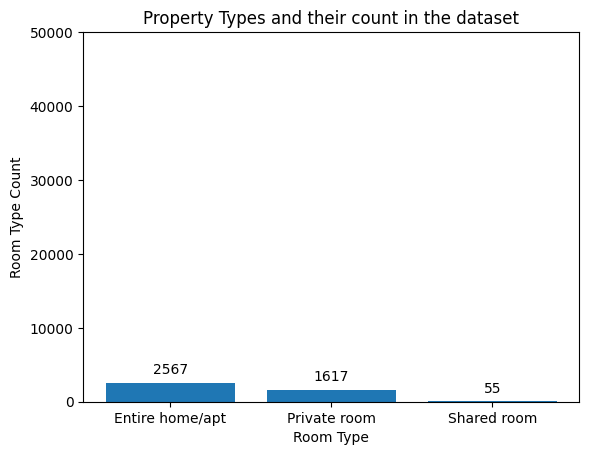

In [26]:
#room type count plottedon a barchart
room_type_bar = plt.bar(property_types.index, property_types.loc[:, "count"] );
plt.bar_label(room_type_bar, labels = property_types.loc[:, "count"],padding = 4);
plt.ylim([0, 50000]);
plt.xlabel('Room Type')
plt.ylabel('Room Type Count')
plt.title('Property Types and their count in the dataset');


In [27]:
hood_group = df['neighbourhood group'].value_counts().to_frame()
print(hood_group)

                     count
neighbourhood group       
Manhattan             1946
Brooklyn              1920
Queens                 294
Bronx                   56
Staten Island           23


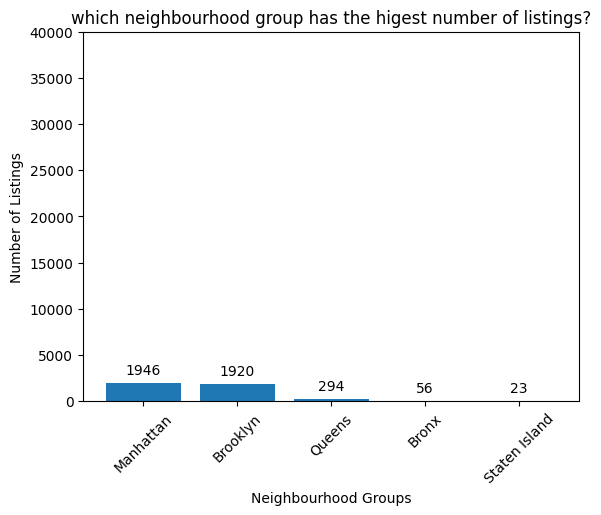

In [28]:
#which neighbourhood group has the higest number of listings?
hood_group_bar = plt.bar(hood_group.index, hood_group.loc[:, "count"] );
plt.bar_label(hood_group_bar, labels = hood_group.loc[:, "count"],padding = 4);
plt.ylim([0, 40000]);
plt.xlabel('Neighbourhood Groups');
plt.ylabel('Number of Listings');
plt.xticks(rotation = 45);
plt.title('which neighbourhood group has the higest number of listings?');

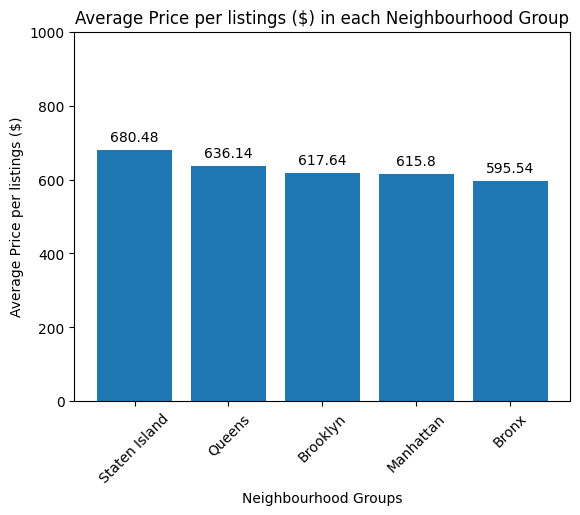

In [44]:
#which neighbourhood group have the higest average price for airbnb listings?
avg_price = df.groupby('neighbourhood group')['price_$'].mean().sort_values(ascending = False).to_frame()
avg_price_bar = plt.bar(avg_price.index, avg_price.loc[:, "price_$"] );
plt.bar_label(avg_price_bar, labels = round(avg_price.loc[:, "price_$"], 2), label_type = 'edge', padding = 4);
plt.ylim([0, 1000]);
plt.xlabel('Neighbourhood Groups');
plt.ylabel('Average Price per listings ($)');
plt.xticks(rotation = 45);
plt.title('Average Price per listings ($) in each Neighbourhood Group');

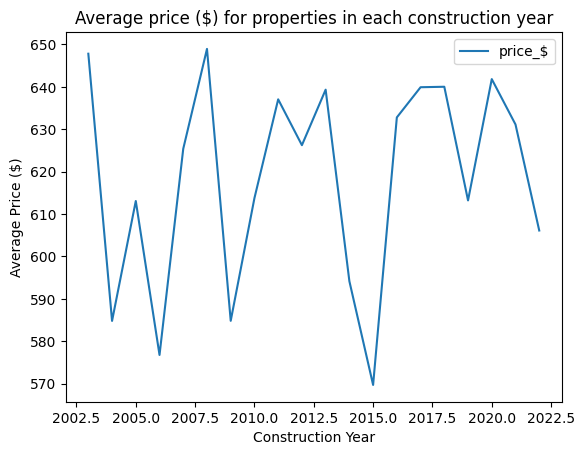

In [31]:
#Is there a realtionship between the construction year of property and price?
df.groupby(df['Construction year'])['price_$'].mean().to_frame().plot();
plt.xlabel('Construction Year');
plt.ylabel('Average Price ($)');
plt.title('Average price ($) for properties in each construction year');

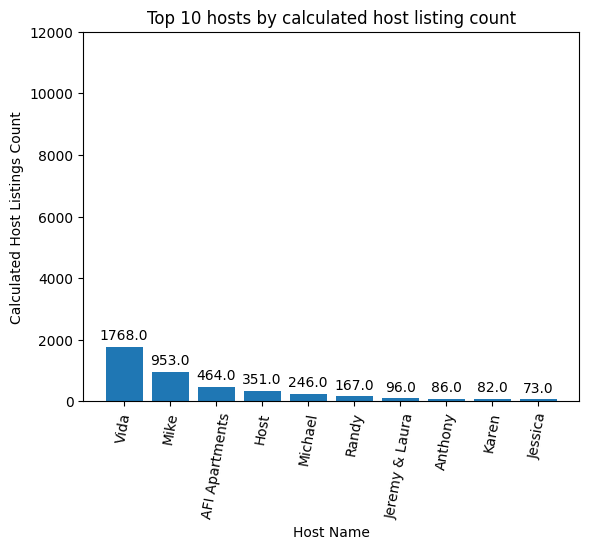

In [45]:
#who are the top 10 hosts by calculated host listing count?
hosts = df.groupby('host name')['calculated host listings count'].sum().sort_values(ascending = False).nlargest(10).to_frame()
hosts_bar = plt.bar(hosts.index, hosts.loc[:, "calculated host listings count"] );
plt.bar_label(hosts_bar, labels = hosts.loc[:, "calculated host listings count"], label_type = 'edge' , padding = 3);
plt.xlabel('Host Name');
plt.ylabel('Calculated Host Listings Count');
plt.xticks(rotation = 80);
plt.ylim([0,12000]);
plt.title('Top 10 hosts by calculated host listing count');

In [34]:
#Are hosts with verified identities more likely to recive positive reviews?
review = df.groupby('host_identity_verified')['review rate number'].mean().sort_values(ascending = False).to_frame()
review

,review rate number
host_identity_verified,
unconfirmed,3.032810
verified,2.959518


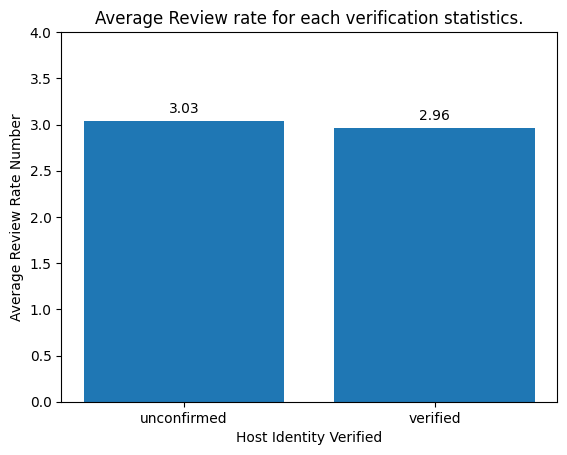

In [35]:
review_bar = plt.bar(review.index, review.loc[:, "review rate number"] );
plt.bar_label(review_bar, labels = round(review.loc[:, "review rate number"], 2), padding = 4);
plt.ylim([0,4]);
plt.xlabel('Host Identity Verified');
plt.ylabel('Average Review Rate Number');
plt.title('Average Review rate for each verification statistics.');

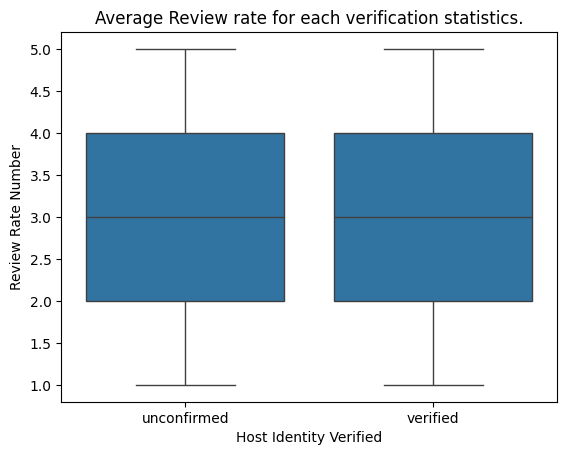

In [36]:
base_color = sns.color_palette()[0]
sns.boxplot(data = df, x = 'host_identity_verified', y = 'review rate number', color = base_color);
plt.xlabel('Host Identity Verified');
plt.ylabel('Review Rate Number');
plt.title('Average Review rate for each verification statistics.');

In [37]:
#is there a correlation between the price of a listing and its service fee?
df['price_$'].corr(df['service_fee_$'])

np.float64(0.9999912905007431)

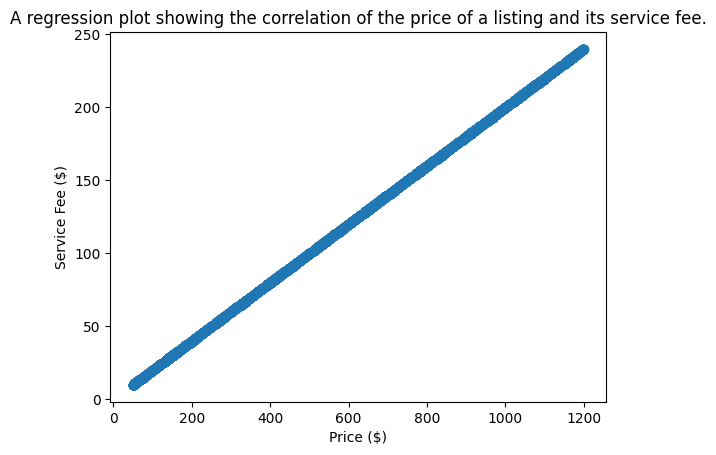

In [38]:
sns.regplot(data = df, x = 'price_$', y = 'service_fee_$');
plt.xlabel('Price ($)');
plt.ylabel('Service Fee ($)');
plt.title('A regression plot showing the correlation of the price of a listing and its service fee.');

In [39]:
#what is the average review rate number (e.g., stars) for listings, and does it vary based on the neighbourhood fgroup and room type?
ARRN = df.groupby(['neighbourhood group', 'room type'])['review rate number'].mean().to_frame()
ARRN

review rate number
neighbourhood group room type                          
Bronx               Entire home/apt            2.941176
                    Private room               3.054054
                    Shared room                1.000000
Brooklyn            Entire home/apt            2.939523
                    Private room               3.085165
                    Shared room                2.555556
Manhattan           Entire home/apt            3.018533
                    Private room               3.035503
                    Shared room                2.793103
Queens              Entire home/apt            2.817460
                    Private room               2.981481
                    Shared room                3.333333
Staten Island       Entire home/apt            2.777778
                    Private room               2.428571

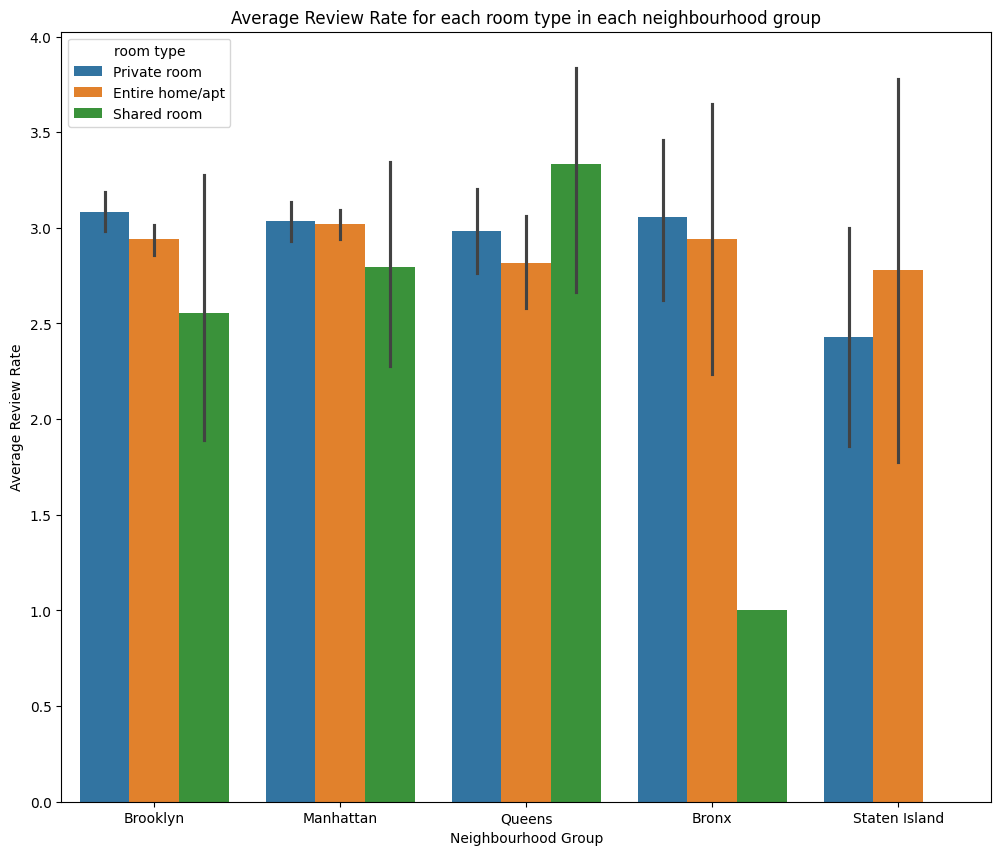

In [40]:
plt.figure(figsize = [12,10]);
sns.barplot( data = df, x = 'neighbourhood group', y = 'review rate number', hue = 'room type');
plt.xlabel('Neighbourhood Group');
plt.ylabel('Average Review Rate');
plt.title('Average Review Rate for each room type in each neighbourhood group');

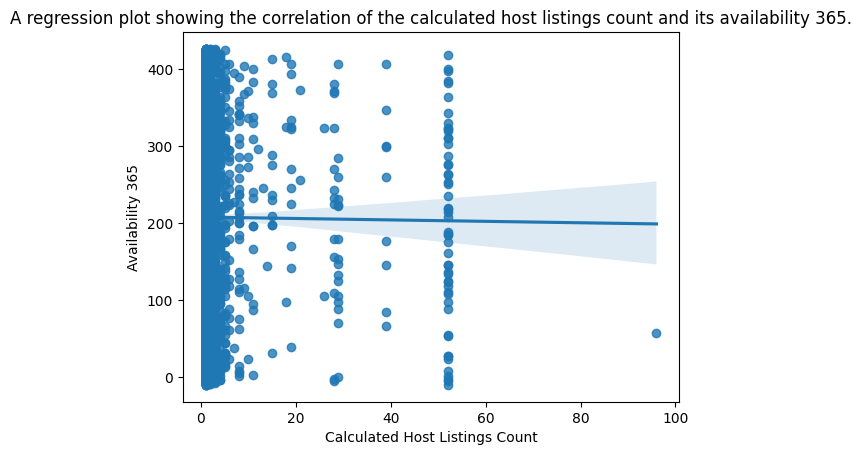

In [41]:
#are hosts with a higher calulated host listings count more likely to maintain higher availability throughout the year?
sns.regplot(df, x = 'calculated host listings count', y = 'availability 365');
plt.xlabel('Calculated Host Listings Count');
plt.ylabel('Availability 365');
plt.title('A regression plot showing the correlation of the calculated host listings count and its availability 365.');

In [42]:
df['calculated host listings count'].corr(df['availability 365'])

np.float64(-0.004888412153730633)